# **Math for CP**

### Agenda -

-  Number theory  
    - Binary exponentiation and recurrences
    - Prime numbers and factorisation
    - Euclidean Algorithms & linear Diaphontine equations
    - Modular arithmetic
    - Theorems in number theory




















# Binary exponentiation

Binary exponentiation (also known as exponentiation by squaring) is a trick which allows to calculate
$a^n$  using only
$O(\log n)$  multiplications (instead of
$O(n)$  multiplications required by the naive approach).

The following recursive approach expresses the same idea:








$$a^n = \begin{cases} 1 &\text{if } n == 0 \\ \left(a^{\frac{n}{2}}\right)^2 &\text{if } n > 0 \text{ and } n \text{ even}\\ \left(a^{\frac{n - 1}{2}}\right)^2 \cdot a &\text{if } n > 0 \text{ and } n \text{ odd}\\ \end{cases}$$

In [ ]:
%%writefile binpow.cpp


long long binpow(long long a, long long b) {
    if (b == 0)
        return 1;
    long long res = binpow(a, b / 2);
    if (b % 2)
        return res * res * a;
    else
        return res * res;
}

Overwriting binpow.cpp


## Binary multiplication

Three numbers a, b and c are of the range of 10^15. Find the value of (a*b)%c

In [ ]:
%%writefile multiply.cpp


#include<bits/stdc++.h>
#define int long long int
using namespace std;

int multiply(int a, int b, int c) {
    int res = 0;
    while (b) {

        // divide b into binary, do the multiplication and take mod after all opeations
        if (b % 2) res = res + a, res %= c;
        a += a; a %= c;
        b /= 2;
    }
    return res;
}

int32_t main()
{

    cout << multiply(20, 20, 1e9 + 7);


    return 0;
}

Writing binpow.cpp


**Problem: Compute
$n$ -th Fibonacci number
$F_n$ .**


$F_{n+1}$ = $F_n + F_{n-1}$
 $\qquad F_0 =0 $, $\ F_1 = 1$


**Idea** - Convert recurrence relations to matrix multiplications

 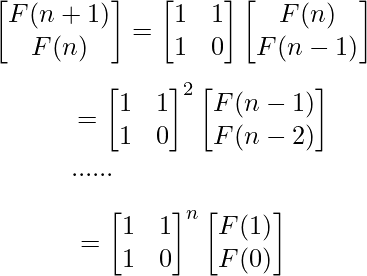



**Sample math problem** -

Consider the sequence of real numbers $ a_{1},a_{2}, \cdots a_{2022} $ such that

$ 5a_{i+1} - a_{i} = 1 +  3a_{i}a_{i+1} $ for each $ 1 \leq i \leq 2022 $  with $a_{1} = a_{2023} $.
Find the sum of all possible values of $ a_{1}a_{2}\cdots a_{2022} $ .

## Matrix exponentiation

In [ ]:
%%writefile fib.cpp

#include <iostream>
#include <string>
//0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144
using namespace std;

// Function to perform matrix multiplication
void matrixMultiplication(int a[][2], int b[][2]) {
    int c[2][2];
    for (int i = 0; i < 2; i++) {
        for (int j = 0; j < 2; j++) {
            c[i][j] = 0;
            for (int k = 0; k < 2; k++) {
                c[i][j] += a[i][k] * b[k][j];
            }
        }
    }
    for (int i = 0; i < 2; i++) {
        for (int j = 0; j < 2; j++) {
            a[i][j] = c[i][j];
        }
    }
}

// Function to raise a matrix to the power n using matrix exponentiation
void matrixPower(int mat[][2], int n) {
    if (n <= 1)
        return;

    int temp[2][2] = {{1, 1}, {1, 0}};
    matrixPower(mat, n / 2);
    matrixMultiplication(mat, mat);

    if (n % 2 != 0)
        matrixMultiplication(mat, temp);
}

// Function to find the nth Fibonacci number using matrix exponentiation
int fibonacci(int n) {
    if (n <= 0)
        return 0;

    int fibMatrix[2][2] = {{1, 1}, {1, 0}};
    matrixPower(fibMatrix, n - 1);

    return fibMatrix[0][0];
}

int main() {
    int n=6;

    int result = fibonacci(n);
    std::cout  << result << endl;

    return 0;
}

Overwriting fib.cpp


In [ ]:
%%script bash

g++ fib.cpp -std=c++11
./a.out


8


# Prime numbers and factorisation
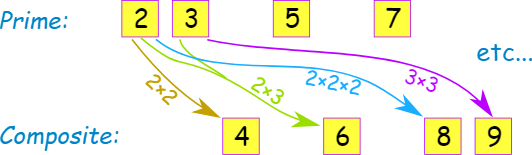




In [ ]:
%%writefile prime1.cpp

// Primality check

#include<bits/stdc++.h>
using namespace std;

// Brute force - try all numbers upto x

bool isPrime1(int x) {
    for (int d = 2; d  < x; d++) {
        if (x % d == 0)
            return false;
    }
    return x >= 2;
}

int main(){


	int x = 143;
  if(isPrime1(x))
  cout<< "Yes"<< endl;
  else
  cout<< "no"<< endl;



	return 0;
}


Writing prime1.cpp


In [ ]:

%%script bash

g++ prime1.cpp -std=c++11
./a.out


no


A composite number has at least one additional divisor, let's call it
$d$ . Naturally
$\frac{n}{d}$  is also a divisor of
$n$ . It's easy to see, that either
$d \le \sqrt{n}$  or
$\frac{n}{d} \le \sqrt{n}$ , therefore one of the divisors
$d$  and
$\frac{n}{d}$  is
$\le \sqrt{n}$

In [ ]:
%%writefile prime.cpp

// Primality check

// Even less Brute force - try all numbers upto sqrt(x)


bool isPrime(int x) {
    for (int d = 2; d * d <= x; d++) {
        if (x % d == 0)
            return false;
    }
    return x >= 2;
}

//



In [ ]:
%%writefile div_count1.cpp

// takecare of perfect squares

#include<bits/stdc++.h>
using namespace std;


int main(){


	int n = 1729;
  int cnt =0;
  for(int i=1;i*i <= n;i++ ){
    if(n%i ==0){
      cnt+=2;
      if(i*i==n)
      cnt--;
    }
  }

  cout <<cnt;



	return 0;
}


Overwriting div_count1.cpp


In [ ]:

%%script bash

g++ div_count1.cpp -std=c++11
./a.out


8

So, finding Div count for all numbers from 1 till n will take around O( $n\sqrt{n}$)

Any ideas?

Iterate on multiples rather than divisors!

In [ ]:
%%writefile div_count2.cpp


#include<bits/stdc++.h>
using namespace std;


int main(){


	int n = 100;
  int cnt =0;
  vector<int> div(n+1);

  for(int i=1;i <= n;i++ ){
    for(int j=i; j<=n;j+=i){
      div[j]++;
    }
  }
for(int i=1;i<n;i++){
  cout<< div[i]<<" ";
}
  cout <<cnt;



	return 0;
}

Overwriting div_count2.cpp


In [ ]:

%%script bash

g++ div_count2.cpp -std=c++11
./a.out


1 2 2 3 2 4 2 4 3 4 2 6 2 4 4 5 2 6 2 6 4 4 2 8 3 4 4 6 2 8 2 6 4 4 4 9 2 4 4 8 2 8 2 6 6 4 2 10 3 6 4 6 2 8 4 8 4 4 2 12 2 4 6 7 4 8 2 6 4 8 2 12 2 4 6 6 4 8 2 10 5 4 2 12 4 4 4 8 2 12 4 6 4 4 4 12 2 6 6 0

So, we got an algorithm to **find all the primes from 1 to n** in O($n$ $log $ $n$). How?

Can we do better than nlogn?

**Sieve of eratosthenes**

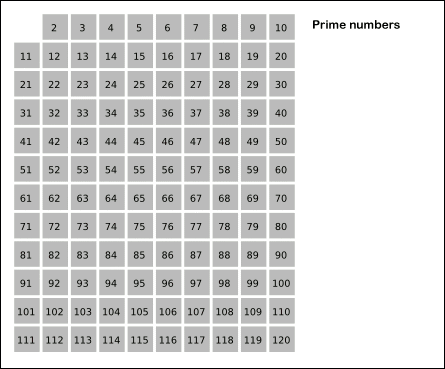

In [ ]:
%%writefile sieve.cpp


// sieve of eratosthenes

#include<iostream>
#include<vector>
using namespace std;
#define N 1000000
#define ll long long


void primeSieve(vector<int> &sieve){


//sieve[x] stores x is prime or not

//Mark 1 and 0 as not prime
    sieve[1] = sieve[0] = 0;
  sieve[2]=1;
    // Initially you can say I will just mark all odd numbers as prime
    for(int i=3; i<=N; i+=2){
        sieve[i] = 1;
    }

    //start from 3 and mark all multiples of given i (prime) as not prime
    for(ll i=3; i<=N; i++){
        if(sieve[i]){
            for(ll j = 2*i; j<=N; j = j + i){
                //marking j as not prime
                sieve[j] = 0;
            }
   //optimise - all numbers less than i*i and are multiples of primes were already marked by primes from 1 to i-1
  //  for(ll j = i*i; j<=N; j = j + i){
    //          //marking j as not prime
    //          sieve[j] = 0;
    //      }


        }
    }
}


int main(){

    vector<int> sieve(N+1,0); //fill constructor


    primeSieve(sieve);

    for(int i=0; i<=1235; i++){
        if(sieve[i]){
            cout<<i <<" ";
        }
    }


    return 0;
}

Overwriting sieve.cpp


In [ ]:

%%script bash

g++ sieve.cpp -std=c++11
./a.out


2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 101 103 107 109 113 127 131 137 139 149 151 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461 463 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577 587 593 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683 691 701 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821 823 827 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941 947 953 967 971 977 983 991 997 1009 1013 1019 1021 1031 1033 1039 1049 1051 1061 1063 1069 1087 1091 1093 1097 1103 1109 1117 1123 1129 1151 1153 1163 1171 1181 1187 1193 1201 1213 1217 1223 1229 1231 

What is the time complexity of the above code? 😖

Ans - O(nloglogn)




Print all divisors of a number n in O($\sqrt n$)

In [ ]:
%%writefile sieve.cpp

#include <iostream>
#include <vector>
#include <cmath>

using namespace std;

vector<int> findDivisors(int n) {
    // Initialize an empty
    // vector to store the divisors
    vector<int> divisors;

    // Iterate up to the square
    // root of n to find divisors
    // Calculate the square root of n
    int sqrtN = sqrt(n);

    // Loop from 1 to the
    // square root of n
    for (int i = 1; i <= sqrtN; ++i) {
        // Check if i divides n
        // without leaving a remainder
        if (n % i == 0) {
            // Add divisor i to the list
            divisors.push_back(i);

            // Add the counterpart divisor
            // if it's different from i
            if (i != n / i) {
                // Add the counterpart
                // divisor to the list
                divisors.push_back(n / i);
            }
        }
    }
    sort(divisors.begin().,divisors.end());
    // Return the list of divisors
    return divisors;
}


int main() {
    int number = 12;
    vector<int> divisors = findDivisors(number);

    cout << "Divisors of " << number << " are: ";
    for (int divisor : divisors) {
        cout << divisor << " ";
    }
    cout << endl;

    return 0;
}

Overwriting sieve.cpp


## Prime factorisation

In [ ]:
%%writefile prime_factorisation.cpp

#include<iostream>
#include<vector>
using namespace std;
#define MAX 10000
#define ll long long

//Idea - We will store the smallest prime factors only.

bool v[MAX];
int len, sp[MAX];

void Sieve(){
    for (int i = 2; i < MAX; i += 2)    sp[i] = 2;//even numbers have smallest prime factor 2
    for (ll i = 3; i < MAX; i += 2){
        if (!v[i]){
            sp[i] = i;
            for (ll j = i; (j*i) < MAX; j += 2){
                if (!v[j*i])    v[j*i] = true, sp[j*i] = i;
            }
        }
    }
}

int main(){
    Sieve();
    for (int i = 2; i < 50; i++)    cout << sp[i] << endl;
  int k= 2024;
    vector <int> pf;
    while(k>1) {
        pf.push_back(sp[k]);
         k/=sp[k];
    }
  for(auto i: pf){
    cout << i << " ";
  }
    return 0;
}

Overwriting prime_factorisation.cpp


In [ ]:
%%script bash

g++ prime_factorisation.cpp -std=c++11
./a.out

2
3
2
5
2
7
2
3
2
11
2
13
2
3
2
17
2
19
2
3
2
23
2
5
2
3
2
29
2
31
2
3
2
5
2
37
2
3
2
41
2
43
2
3
2
47
2
7
2 2 2 11 23 

Overall time complexity = O(QlogN + Nloglogn)

Practice prob- [Medium Factorization](https://www.spoj.com/problems/FACTCG2/)

How to generate all primes between 2 given numbers?  Read about segmented sieve 😙

#**Euclidean algorithm for computing the GCD and LCM**


$$\gcd(a, b) = \begin{cases}a,&\text{if }b = 0 \\ \gcd(b, a \bmod b),&\text{otherwise.}\end{cases}$$

Time complexity =    $O(\log \min(a, b))$ .

**Proof**

$$ a \bmod b \leq a/2 $$



In [30]:
%%writefile gcd.cpp


int gcd (int a, int b) {
    if (b == 0)
        return a;
    else
        return gcd (b, a % b);
}

int gcd (int a, int b) {
    while (b) {
        a %= b;
        swap(a, b);
    }
    return a;
}

Overwriting prime_factorisation.cpp


## Bezout's Identity

For nonzero integers
𝑎
 and
𝑏
, let
𝑑
 be the greatest common divisor
𝑑
=
gcd
(
𝑎,
𝑏
)
. Then, there exist integers
𝑥
 and
𝑦
 such that,

𝑎
𝑥
+
𝑏
𝑦
=
𝑑
.

[Proof](https://brilliant.org/wiki/bezouts-identity/)

## Extended Euclidean Algorithm

While the Euclidean algorithm calculates only the greatest common divisor (GCD) of two integers
$a$  and
$b$ , the extended version also finds a way to represent GCD in terms of
$a$  and
$b$ , i.e. coefficients
$x$  and
$y$  for which:


$$a \cdot x + b \cdot y = \gcd(a, b)$$

It's important to note that by Bézout's identity we can always find such a representation.


Lets take 30 and 18,

We have 30x+18y= g(30,18)= g(18,12) = gcd(12,60 = gcd(6,0)=6 = 6.(1) + 0.(0)

30x1+18y1 = 18x2+12y2 = 12x3+ 6y3 = 6x4 = 6



We will denote the GCD of
$a$  and
$b$  with
$g$ .

The changes to the original algorithm are very simple. If we recall the algorithm, we can see that the algorithm ends with
$b = 0$  and
$a = g$ . For these parameters we can easily find coefficients, namely
$g \cdot 1 + 0 \cdot 0 = g$ .

Starting from these coefficients
$(x, y) = (1, 0)$ , we can go backwards up the recursive calls. All we need to do is to figure out how the coefficients
$x$  and
$y$  change during the transition from
$(a, b)$  to
$(b, a \bmod b)$ .

Let us assume we found the coefficients
$(x_1, y_1)$  for
$(b, a \bmod b)$ :


$$b \cdot x_1 + (a \bmod b) \cdot y_1 = g$$
and we want to find the pair
$(x, y)$  for
$(a, b)$ :


$$ a \cdot x + b \cdot y = g$$
We can represent
$a \bmod b$  as:




$$ a \bmod b = a - \left\lfloor \frac{a}{b} \right\rfloor \cdot b$$
Substituting this expression in the coefficient equation of
$(x_1, y_1)$  gives:




$$ g = b \cdot x_1 + (a \bmod b) \cdot y_1 = b \cdot x_1 + \left(a - \left\lfloor \frac{a}{b} \right\rfloor \cdot b \right) \cdot y_1$$
and after rearranging the terms:




$$g = a \cdot y_1 + b \cdot \left( x_1 - y_1 \cdot \left\lfloor \frac{a}{b} \right\rfloor \right)$$
We found the values of
$x$  and
$y$ :






$$\begin{cases} x = y_1 \\ y = x_1 - y_1 \cdot \left\lfloor \frac{a}{b} \right\rfloor \end{cases} $$

In [32]:
%%writefile gcd.cpp

int gcd(int a, int b, int& x, int& y) {
    if (b == 0) {
        x = 1;
        y = 0;
        return a;
    }
    int x1, y1;
    int d = gcd(b, a % b, x1, y1);
    x = y1;
    y = x1 - y1 * (a / b);
    return d;
}

Writing gcd.cpp


## Diaphontine equations

Number theory studies the integers, and linear equations are the most fundamental of
mathematical relationships. Uniting these ideas, we now investigate **linear Diophantine
equations**, linear equations that permit only integer solutions.



The diophantine equation ax+by=c
 has solutions if and only if **gcd(a,b)|c**

 **If we have (x0, y0) such that ax0 + by0 = 1, how can we find all (x, y) such that
ax + by = c?**

Multiplying both sides of this equation by c, we have
a(cx0) + b(cy0) = c.
This tells us that (cx0, cy0) is one specific (x, y).

How can we find all (x, y)?

Constructively, for a
parameter k ∈ Z, we can come up with x = bk + cx0 and y = −ak + cy0. Substituting these in
gives us
a(bk + cx0) + b(−ak + cy0) = abk + a(cx0) − abk + b(cy0) = a(cx0) + b(cy0) = c.

Therefore, **all (x, y) are given by (bk + cx0, −ak + cy0); k ∈ Z** . As an aside, if (a, b) 6= 1 in a
general Diophantine ax + by = c to start, we can fix the Diophantine by dividing out by (a, b) as
we require c|(a, b) regardless.

# Modular Arithmetic


The term “modulo”, commonly abbreviated “mod”, is notation used to demonstrate a remainder
after dividing one thing by another. For example, we say 8 ≡ 2 (mod 3), because 8 leaves a
remainder of 2 when divided by 3.

In
modular arithmetic
, instead of working with integers themselves, we work
with their remainders when divided by
$m$
. We call this taking modulo
$m$
. For
example, if we take
$m = 23$
, then instead of working with
$x = 247$
, we use

$x \bmod 23 = 17$
.

I will define the notation n mod m
 (for integers n
 and m
) to mean n−⌊n/m⌋⋅m
, where ⌊x⌋
 is the largest integer that doesn't exceed x


Modular arithmetic is used to avoid dealing with numbers that overflow built-in
data types, because we can take remainders, according to the following formulas:

$$(a+b) \bmod m = (a \bmod m + b \bmod m) \bmod m$$

$$(a-b) \bmod m = (a \bmod m - b \bmod m) \bmod m$$

$$(a \cdot b) \pmod{m} = ((a \bmod m) \cdot (b \bmod m)) \bmod m$$
$$(a  /b) \pmod{m} = ((a \bmod m) \cdot ({b}^{-1} \bmod m)) \bmod m$$


$$a^b \bmod {m} = (a \bmod m)^b \bmod m$$

In [ ]:

%%writefile mod_arith.cpp

#include <bits/stdc++.h>
using namespace std;

// Function to perform Modular Addition
int modAdd(int a, int b, int m)
{
    return ((a % m) + (b % m)) % m;
}

// Function to perform Modular Subtraction
int modSub(int a, int b, int m)
{
    return ((a % m) - (b % m) + m)
        % m; // Adding m to handle negative numbers
}

// Function to perform Modular Multiplication
int modMul(int a, int b, int m)
{
    return ((a % m) * (b % m)) % m;
}


// Function to perform Modular Division
int modDiv(int a, int b, int m)
{
    a = a % m;
    int inv = modInverse(b, m);
    return (inv * a) % m;
}


## Finding Multiplicative inverse

A modular multiplicative inverse of an integer
$a$  is an integer
$x$  such that
$a \cdot x$  is congruent to
$1$  modular some modulus
$m$ . To write it in a formal way: we want to find an integer
$x$  so that


$$a \cdot x \equiv 1 \mod m.$$
We will also denote
$x$  simply with
$a^{-1}$ .

modular inverse exists if and only if
$a$  and
$m$  are relatively prime (i.e.
$\gcd(a, m) = 1$ ).

How to find Modular Inverse ?

Use **Extended Euclidean algo** !

In [ ]:
ll inverse(ll a, ll m) {
  ll x, y;
  ll g = extended_euclid(a, m, x, y);
  if (g != 1) return -1;
  return (x % m + m) % m;
}

# Theorems in number theory

## Chinese Remainder Theorem

 For linear
equations, we’ve discussed linear congruences. But consider systems of linear equations.

Let
$m = m_1 \cdot m_2 \cdots m_k$ , where
$m_i$  are pairwise coprime. In addition to
$m_i$ , we are also given a system of congruences




$$\left\{\begin{array}{rcl} x & \equiv & a_1 \pmod{m_1} \\ x & \equiv & a_2 \pmod{m_2} \\ & \vdots & \\ x & \equiv & a_k \pmod{m_k} \end{array}\right.$$
where
$a_i$  are some given constants. The original form of CRT then states that the given system of congruences always has one and exactly one solution modulo
$m$ .

E.g. the system of congruences




$$\left\{\begin{array}{rcl} a & \equiv & 2 \pmod{3} \\ a & \equiv & 3 \pmod{5} \\ a & \equiv & 2 \pmod{7} \end{array}\right.$$
has the solution
$23$  modulo
$105$ , because
$23 \bmod{3} = 2$ ,
$23 \bmod{5} = 3$ , and
$23 \bmod{7} = 2$ . We can write down every solution as
$23 + 105\cdot k$  for
$k \in \mathbb{Z}$ .

Corollary¶
A consequence of the CRT is that the equation


$$x \equiv a \pmod{m}$$
is equivalent to the system of equations




$$\left\{\begin{array}{rcl} x & \equiv & a_1 \pmod{m_1} \\ & \vdots & \\ x & \equiv & a_k \pmod{m_k} \end{array}\right.$$
(As above, assume that
$m = m_1 m_2 \cdots m_k$  and
$m_i$  are pairwise coprime).

## Proof by construction
Let
$M_i := \prod_{i \neq j} m_j$ , the product of all moduli but
$m_i$ , and
$N_i$  the modular inverses
$N_i := M_i^{-1} \bmod{m_i}$ . Then a solution to the system of congruences is:




$$x \equiv \sum_{i=1}^k a_i M_i N_i \pmod{m_1 m_2 \cdots m_k}$$
We can check this is indeed a solution, by computing
$a \bmod{m_i}$  for all
$i$ . Because
$M_j$  is a multiple of
$m_i$  for
$i \neq j$  we have




$$\begin{array}{rcll} x & \equiv & \sum_{j=1}^k a_j M_j N_j & \pmod{m_i} \\ & \equiv & a_i M_i N_i & \pmod{m_i} \\ & \equiv & a_i M_i M_i^{-1} & \pmod{m_i} \\ & \equiv & a_i & \pmod{m_i} \end{array}$$


###  Euler Totient function

Euler's totient function, also known as phi-function
$\phi (n)$ , counts the number of integers between 1 and
$n$  inclusive, which are coprime to
$n$ . Two numbers are coprime if their greatest common divisor equals
$1$




 \begin{align}
\phi (n) &= \phi ({p_1}^{a_1}) \cdot \phi ({p_2}^{a_2}) \cdots  \phi ({p_k}^{a_k}) \\\\
&= \left({p_1}^{a_1} - {p_1}^{a_1 - 1}\right) \cdot \left({p_2}^{a_2} - {p_2}^{a_2 - 1}\right) \cdots \left({p_k}^{a_k} - {p_k}^{a_k - 1}\right) \\\\
&= p_1^{a_1} \cdot \left(1 - \frac{1}{p_1}\right) \cdot p_2^{a_2} \cdot \left(1 - \frac{1}{p_2}\right) \cdots p_k^{a_k} \cdot \left(1 - \frac{1}{p_k}\right) \\\\
&= n \cdot \left(1 - \frac{1}{p_1}\right) \cdot \left(1 - \frac{1}{p_2}\right) \cdots \left(1 - \frac{1}{p_k}\right)
\end{align}





In [ ]:
%%writefile totient.cpp


#include<bits/stdc++.h>
#define int long long int
using namespace std;

const int N = 1e5;

void calculate_totient() {
    vector<bool> pr(N, true);
    vector<int> tot(N);

    for (int i = 2; i < N; i++) {
        for (int j = i * i; j < N; j += i) {
            pr[j] = false;
        }
    }

    iota(tot.begin(), tot.end(), 0);

    for (int i = 2; i < N; i++) {
        if (pr[i] == true) {

            // multiples of prime
            for (int j = i; j < N; j += i) {
                // j is divisible by i
                // i is prime
                //we are looping by multiples rather than divisors
                tot[j] /= i;
                tot[j] *= (i - 1);
            }
        }
    }

    for (int i = 1; i <= 10; i++) {
        cout << i << " " << tot[i] << '\n';
    }

}

int32_t main()
{

    calculate_totient();

    return 0;
}

Writing main.cpp


In [ ]:

%%script bash

g++ totient.cpp -std=c++11
./a.out

1 1
2 1
3 2
4 2
5 4
6 2
7 6
8 4
9 6
10 4


## Eulers theorem

if
$a$  and
$m$  are relatively prime, then that the following congruence is true :


$$a^{\phi (m)} \equiv 1 \mod m$$

If
$m$  is a prime number, this simplifies to **Fermat's little theorem:**


$$a^{m - 1} \equiv 1 \mod m$$



**Practice Math problems**

1) Determine the **last three digits** of ${2024^{2023^{2022^{\dots^{2^{1}}}}}}$

2) How many ways are there to write 2024 as the sum of fours and elevens, ignoring
order? (For example, 506 · 4 + 0 · 11 and 484 · 4  + 8 · 11 are two such ways.)

3) Solve the following system.

x ≡ 2 (mod 3)

x ≡ 2 (mod 4)

x ≡ 1 (mod 5)

x ≡ 5 (mod 6)

### Chicken McNugget Theorem AKA Postal stamp/Frobenius Coin problem

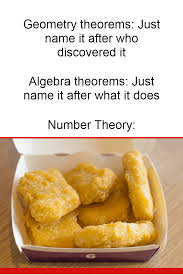


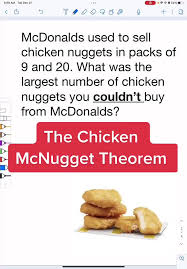



The “Chicken McNugget Problem” is a famous problem in math that was inspired by buying chicken
nuggets at McDonald’s. At the time, McDonald’s sold chicken nuggets in packs of 6, 9, and 20,
where you could only buy full packs (so for example, you could not only buy 5 out of the 20 nuggets
in the 20 pack for 1/4 of the price). The question was, **what is the largest whole number of nuggets
that you can’t buy**, if such a number exists?

**Theorem** - For any two relatively prime positive integers $m,n$, the greatest integer that cannot be written in the form $am + bn$ for nonnegative integers $a, b$ is **mn-m-n**.

[Proofs](https://https://artofproblemsolving.com/wiki/index.php?title=Chicken_McNugget_Theorem) and [additional resources](https://cdn.artofproblemsolving.com/attachments/a/b/0b25127105242dd8716a9fd176136592c1856a.pdf)


 **Practice problem**

You are given an integer x
. Can you make x
 by summing up some number of 11,111,1111,11111,…
? (You can use any number among them any number of times).

For instance,

33=11+11+11
144=111+11+11+11




**Input**

The first line of input contains a single integer t
 (1 ≤ t ≤ 10000)
 — the number of testcases.

The first and only line of each testcase contains a single integer x
 (1 ≤ x ≤ 109)
 — the number you have to make.


**Output**

For each testcase, you should output a single string. If you can make x
, output "YES" (without quotes). Otherwise, output "NO".

You can print each letter of "YES" and "NO" in any case (upper or lower).


In [ ]:
void solve () {
    int n;
    cin>>n;
    if (n>=1100) {
        cout<<"YES\n";
        return;
    }
    if (n/111>=n%11) {
        cout<<"YES\n";
    }   else {
            cout<<"NO\n";
        }
}